In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
print("imported!")

imported!


In [2]:
Data=pd.read_csv('C:/Users/venka/Downloads/titanic (2)/train.csv')

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
print("#Age missing entries =",Data.Age.isnull().sum())
print("#survived missing entries =",Data.Survived.isnull().sum())
print("#Pclass missing entries =",Data.Pclass.isnull().sum())
print("#SibSp missing entries =",Data.SibSp.isnull().sum())
print("#Parch missing entries =",Data.Parch.isnull().sum())
print("#Fare missing entries =",Data.Fare.isnull().sum())
print("#Cabin missing entries =",Data.Cabin.isnull().sum())
print("#Embarked missing entries =",Data.Embarked.isnull().sum())

#Age missing entries = 177
#survived missing entries = 0
#Pclass missing entries = 0
#SibSp missing entries = 0
#Parch missing entries = 0
#Fare missing entries = 0
#Cabin missing entries = 687
#Embarked missing entries = 2


In [6]:
Data[Data.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


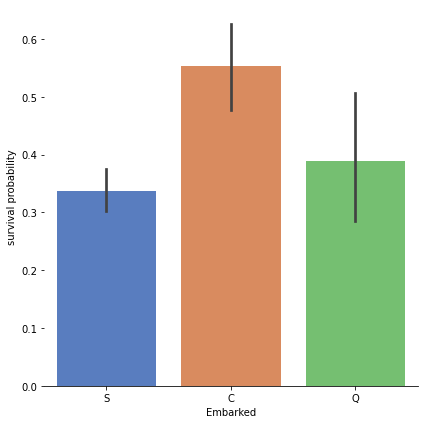

In [7]:
g = sns.catplot(x="Embarked", y="Survived",  data=Data,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [8]:
Data=Data.fillna({'Embarked':'C'})

In [9]:
print("#Embarked missing entries =",Data.Embarked.isnull().sum())

#Embarked missing entries = 0


In [10]:
Data=Data.fillna({"Cabin":'X'})
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,X,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,X,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,X,S


In [11]:
Data["Cabin"]=Data["Cabin"].str.slice(0,1)

In [12]:
Data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,X,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,X,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,X,S
5,0,3,male,NaN,0,0,8.4583,X,Q
6,0,1,male,54.0,0,0,51.8625,E,S
7,0,3,male,2.0,3,1,21.0750,X,S
8,1,3,female,27.0,0,2,11.1333,X,S
9,1,2,female,14.0,1,0,30.0708,X,C


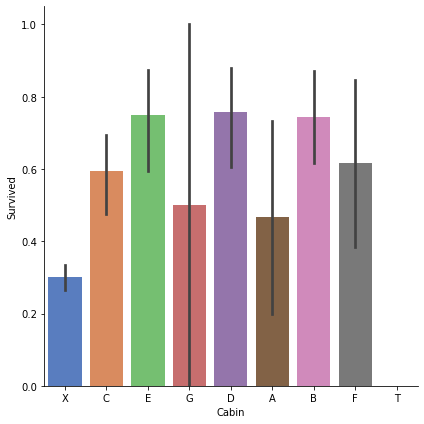

In [13]:
plot1=sns.catplot(x="Cabin", y="Survived",  data=Data,
                   height=6, kind="bar", palette="muted")

In [14]:
Data['Cabin']=Data['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
Data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,8,S
1,1,1,female,38.0,1,0,71.2833,2,C
2,1,3,female,26.0,0,0,7.9250,8,S
3,1,1,female,35.0,1,0,53.1000,2,S
4,0,3,male,35.0,0,0,8.0500,8,S
5,0,3,male,NaN,0,0,8.4583,8,Q
6,0,1,male,54.0,0,0,51.8625,4,S
7,0,3,male,2.0,3,1,21.0750,8,S
8,1,3,female,27.0,0,2,11.1333,8,S
9,1,2,female,14.0,1,0,30.0708,8,C


In [15]:
Data['Sex']=Data['Sex'].replace(['male','female'],[0,1])
Data['Embarked']=Data['Embarked'].replace(['S','C','Q'],[0,1,2])
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,8,0
1,1,1,1,38.0,1,0,71.2833,2,1
2,1,3,1,26.0,0,0,7.9250,8,0
3,1,1,1,35.0,1,0,53.1000,2,0
4,0,3,0,35.0,0,0,8.0500,8,0


<AxesSubplot:>

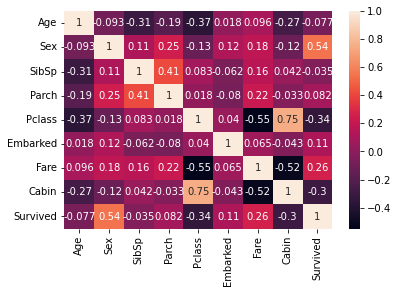

In [16]:
sns.heatmap(Data[["Age","Sex","SibSp","Parch","Pclass","Embarked","Fare","Cabin","Survived"]].corr(),annot=True)

In [17]:
age_means=np.zeros((3,9))
median=Data.Age.mean()
for classNum in range (0,Data.Pclass.max()):  # 0 --> 1st class
    for sibNum in range (0,Data.SibSp.max()+1): # adding one to take the range [0,8] not [0,8[.
        age_means[classNum][sibNum]=Data["Age"][(Data["Pclass"]==(classNum+1)) & (Data["SibSp"]==sibNum)].mean()
        if np.isnan(age_means[classNum][sibNum]):
            age_means[classNum][sibNum]=median

In [18]:
print(age_means)

[[39.18141593 37.41415385 37.2        22.         29.69911765 29.69911765
  29.69911765 29.69911765 29.69911765]
 [31.93422018 27.36363636 19.125      30.         29.69911765 29.69911765
  29.69911765 29.69911765 29.69911765]
 [27.6302008  24.91269841 18.875       8.875       7.05555556 10.2
  29.69911765 29.69911765 29.69911765]]


In [19]:
Null_indx=list(Data["Age"][Data["Age"].isnull()].index)

In [20]:
for i in Null_indx:
    Data["Age"].iloc[i]=age_means[Data.Pclass[i] - 1][Data.SibSp[i]]
    
print("#Age missing entries =",Data.Age.isnull().sum())

C:\Users\venka\AppData\Local\Temp\ipykernel_74452\3492763763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Age"].iloc[i]=age_means[Data.Pclass[i] - 1][Data.SibSp[i]]


#Age missing entries = 0


In [21]:
Y=Data.Survived
X=Data
X.drop(['Survived'],axis=1,inplace=True)

In [22]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=3)

In [23]:
classifier= GaussianNB()
classifier.fit(X_train, Y_train)
classifier.class_prior_

array([0.61797753, 0.38202247])

In [24]:
predicts=classifier.predict(X_test)
accuracy=round(accuracy_score(predicts,Y_test),3)
print(accuracy)

0.732


In [26]:
test=pd.read_csv('C:/Users/venka/Downloads/titanic (2)/test.csv')
IDs=test.PassengerId
test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [27]:
test.Sex=test.Sex.replace(['male','female'],[0,1])
test.Embarked=test.Embarked.replace(['S','C','Q'],[0,1,2])
test=test.fillna({"Cabin":'X'})
test["Cabin"]=test["Cabin"].str.slice(0,1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,X,2
1,3,1,47.0,1,0,7.0000,X,0
2,2,0,62.0,0,0,9.6875,X,2
3,3,0,27.0,0,0,8.6625,X,0
4,3,1,22.0,1,1,12.2875,X,0


In [28]:
Null_test=list(test["Age"][test["Age"].isnull()].index)
for i in Null_test:
    test["Age"].iloc[i]=age_means[test.Pclass[i] - 1][test.SibSp[i]]
print("#Age missing entries =",Data.Age.isnull().sum())
print("#Pclass missing entries =",test.Pclass.isnull().sum())
print("#SibSp missing entries =",test.SibSp.isnull().sum())
print("#Parch missing entries =",test.Parch.isnull().sum())
print("#Fare missing entries =",test.Fare.isnull().sum())
print("#Embarked missing entries =",test.Embarked.isnull().sum())

C:\Users\venka\AppData\Local\Temp\ipykernel_74452\3846641760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Age"].iloc[i]=age_means[test.Pclass[i] - 1][test.SibSp[i]]


#Age missing entries = 0
#Pclass missing entries = 0
#SibSp missing entries = 0
#Parch missing entries = 0
#Fare missing entries = 1
#Embarked missing entries = 0


In [29]:
test['Cabin']=test['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
test=test.fillna({'Fare':34})
subPredictions=classifier.predict(test)
subFile=pd.DataFrame({'PassengerId': [],'Survived':[]})
subFile.PassengerId=IDs
subFile.Survived=subPredictions
subFile.to_csv( 'MySubmissionCabin' ,index=False)
subFile.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
